In [ ]:
#!pip install -v git+https://github.com/kevwilhelm95/pyCfS.git

In [1]:
from pyCfS import Combine, GoldStandards, Clinical
import pandas as pd
import matplotlib.pyplot as plt
import IPython

# Combine

In [9]:
# Load files
eaml = pd.read_csv("/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Runs/v5_BigPipeline_Mu_PyCFS/AgeSexBMI_Match_23Train/IMSB_3ML_Resources/Method_AllPVal/EAML_AF_1-0.005/EAML_output/meanMCC-results.nonzero-stats.rankings", sep = ',')
epi = pd.read_csv("/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Runs/v5_BigPipeline_Mu_PyCFS/AgeSexBMI_Match_23Train/IMSB_3ML_Resources/Method_AllPVal/EPIMUTESTR_output/EPI_output.tsv", sep = '\t', header = None, names = ['gene', 'pvalue', 'qvalue'])
gene_embed = pd.read_csv("/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Runs/v5_BigPipeline_Mu_PyCFS/AgeSexBMI_Match_23Train/IMSB_3ML_Resources/Method_AllPVal/EAWavelet_output/wavelet_output.csv", sep = ',')
savepath = "/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Genomics CFS Scripts/pyCFS Package/pyCFS_project/Examples/FunctionalConsensus_Clustering/"
print(f"EAML: {eaml.columns}")
print(f"EPI: {epi.columns}")
print(f"Gene Embed: {gene_embed.columns}")

EAML: Index(['gene', 'MCC', 'std', 'logMCC', 'zscore', 'pvalue', 'qvalue'], dtype='object')
EPI: Index(['gene', 'pvalue', 'qvalue'], dtype='object')
Gene Embed: Index(['distance', 'gene', 'z', 'p', 'fdr'], dtype='object')


       gene  occurrences                lists
0   SLC30A8            3  eaml,epi,gene_embed
9      RRP1            3  eaml,epi,gene_embed
94    TGFB1            3  eaml,epi,gene_embed
48     TP53            3  eaml,epi,gene_embed
47   HIVEP1            3  eaml,epi,gene_embed


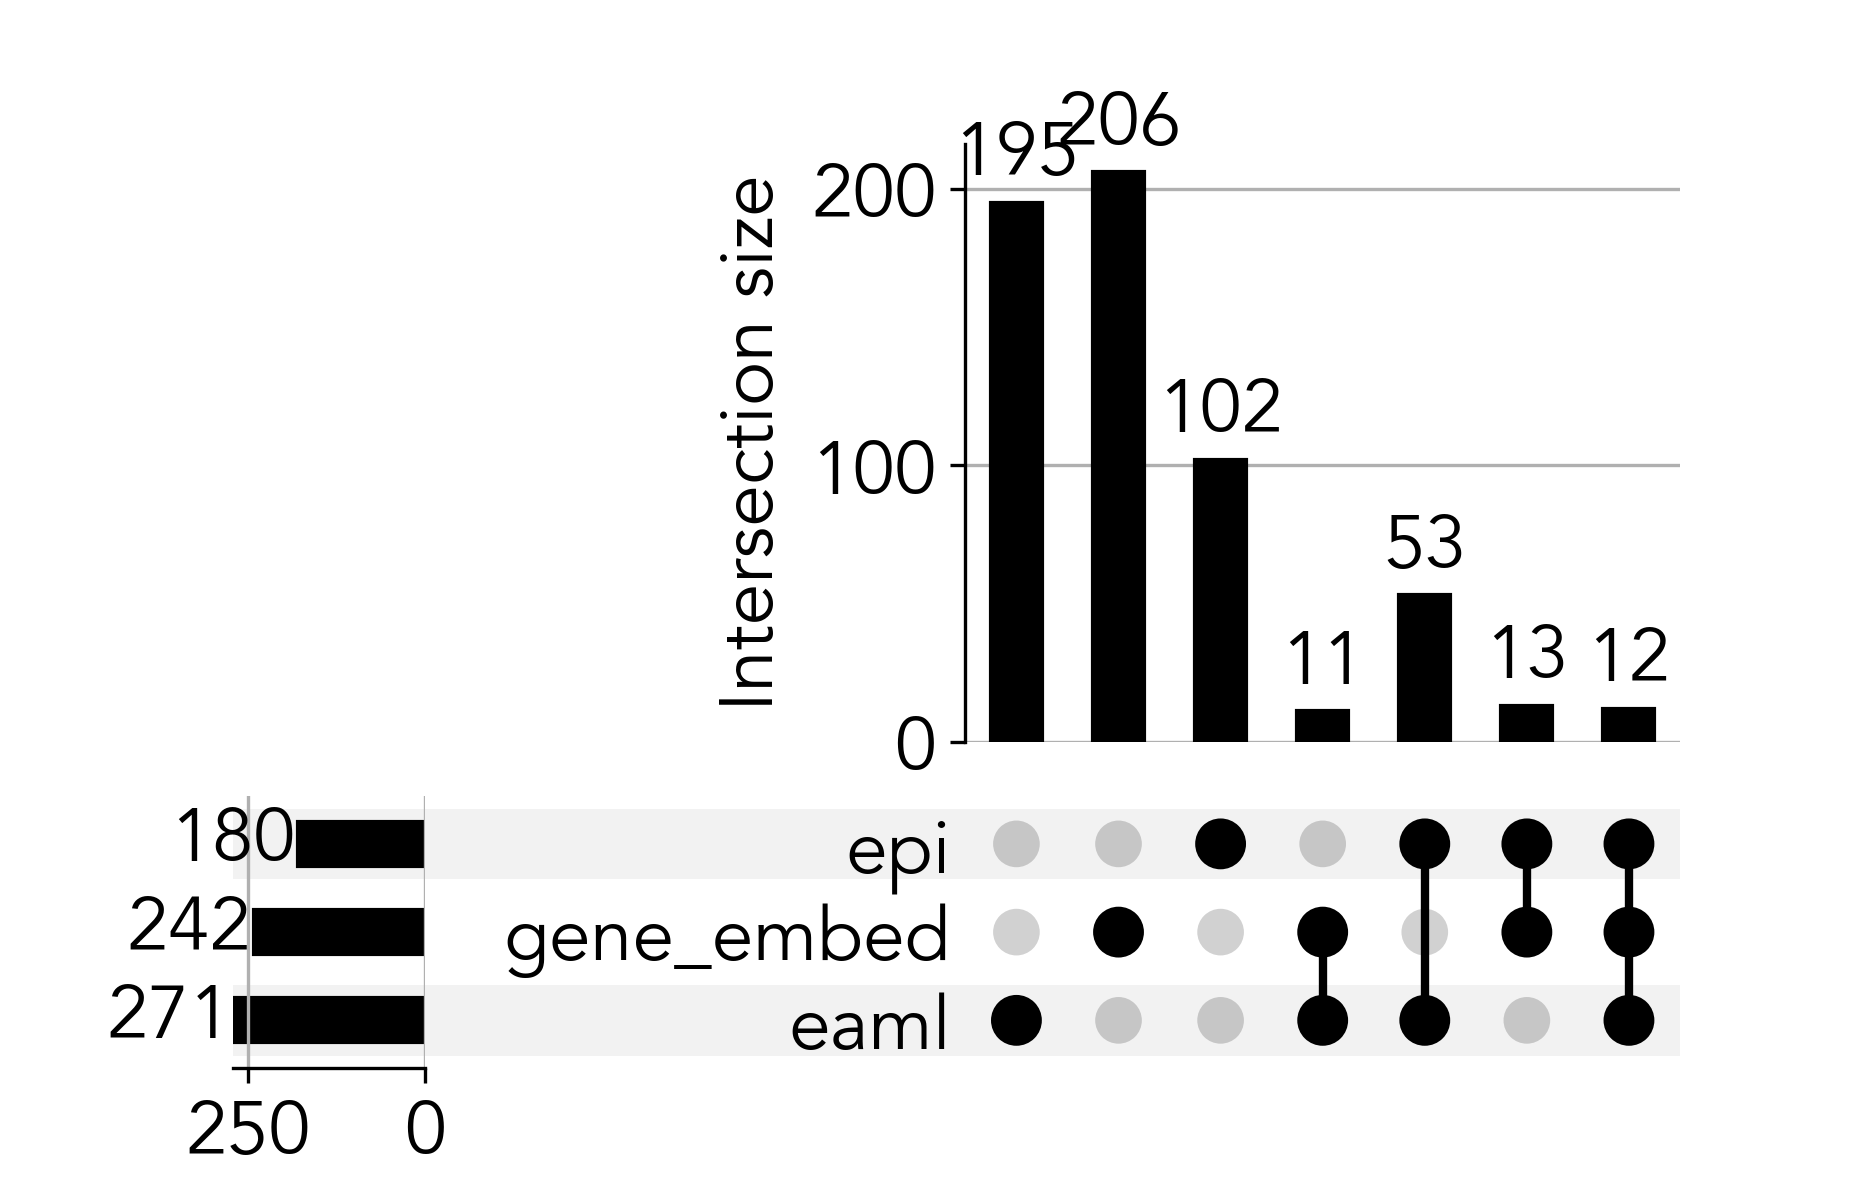

In [10]:
# Consensus
eaml_filt = eaml.gene[eaml.qvalue <= 0.1].dropna().tolist()
epi_filt = epi.gene[epi.qvalue <= 0.1].dropna().tolist()
gene_embed_filt = gene_embed.gene[gene_embed.fdr <= 0.1].dropna().tolist()

combination_df, upset_plot = Combine.consensus(
    genes_1 = eaml_filt,
    genes_2 = epi_filt,
    genes_3 = gene_embed_filt,
    list_names = ['eaml', 'epi', 'gene_embed'],
    plot_fontsize = 18
)
print(combination_df.head(5))
upset_plot

In [11]:
# Functional Clustering
eaml_filt = eaml.gene[eaml.qvalue <= 0.1].dropna().tolist()
epi_filt = epi.gene[epi.qvalue <= 0.1].dropna().tolist()
gene_embed_filt = gene_embed.gene[gene_embed.fdr <= 0.1].dropna().tolist()

if __name__ == "__main__":    
    true_gene_network, true_cluster_df, true_clusters_enrichment_df_dict = Combine.functional_clustering(
        genes_1 = eaml_filt,
        genes_2 = gene_embed_filt,
        genes_3 = epi_filt,
        source_names = ['eaml', 'gene_embed', 'epi'],
        evidences = ['all'],
        edge_confidence = 'highest',
        random_iter = 4, # Very low for testing purposes
        #inflation = 3.2,
        cores = 3
    )

print("True Gene Network")
print(true_gene_network.head(5))
print("\n True Cluster df")
print(true_cluster_df.head(5))
print("\n true clusters enrichment df dict")
print(true_clusters_enrichment_df_dict['cluster_1']['reactomes'].head(5))

Using algorithmically determined inflation parameter: 1.5
True Gene Network
          node1   node2  neighborhood  fusion  cooccurence  coexpression  \
11577415  ABCB1   EP300           1.0     1.0          1.0      1.000000   
11577276  ABCB1    TP53           1.0     1.0          1.0      1.000000   
3760329   ABCC8  KCNJ11           1.0     1.0          1.0      0.871741   
5518893   ACACB    DLAT           1.0     1.0          1.0      0.976017   
5519288   ACACB    ACLY           1.0     1.0          1.0      0.369135   

          experimental  database  textmining     score inputGenePair  \
11577415      0.963504  0.104275    0.856100  0.917514           yes   
11577276      1.000000  0.104275    0.399374  0.960063           yes   
3760329       0.058394  0.291971    0.007299  0.999896           yes   
5518893       0.982273  0.104275    0.761210  0.927022           yes   
5519288       1.000000  0.208551    0.285714  0.978907           yes   

                         pair  
11

In [6]:
# Statistical combo
eaml_p = eaml[['gene', 'pvalue']]
epi_p = epi[['gene', 'pvalue']]
gene_embed_p = gene_embed[['gene', 'p']]

consensus = Combine.statistical_combination(df_1 = eaml_p, df_2 = epi_p, df_3 = gene_embed_p, list_names = ['eaml', 'epi', 'gene_embed'])
consensus.head(3)

,gene,p_eaml,p_epi,p_gene_embed,p.cauchy,p.min,p.mcm,p.cmc,p.multiply
0,SLC30A8,4.499715e-19,1.372028e-30,0.000138,0.000000,1.372028e-30,0.000000,0.000000e+00,8.504458e-53
1,FHOD1,6.110000e-07,8.137012e-04,0.074240,0.000002,6.110000e-07,0.000001,9.163261e-07,3.690991e-11
2,ITM2C,1.196934e-06,2.348293e-02,0.987759,0.000004,1.196934e-06,0.000002,1.795422e-06,2.776345e-08


# GoldStandard

In [2]:
# Load genelists
cauchy = pd.read_csv('/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Runs/v5_BigPipeline_Mu_PyCFS/AgeSexBMI_Match_23Train/IMSB_3ML_Resources/GeneLists/StatisticalCombo/StatComboLists/Cauchy/v5_T2D_3Method_Cauchey_p<1.e-04.txt', header = None, names = ['Gene'])
gs = pd.read_csv('/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/GoldStandards/Individual Lists/OpenTargetPlatform_07.24.23/OpenTargets_Score>0.6_Genetics>0.6_GenomeExome/OpenTarget_Set2_2_7.27.23.txt', header = None, names = ['Gene'])
cauchy = cauchy['Gene'].tolist()
gs = gs['Gene'].tolist()
print("Cauchy: ", len(cauchy))
print("GS: ", len(gs))

Cauchy:  178
GS:  11


pval = 0.00011023520251439876
['SLC30A8', 'KCNJ11', 'ABCC8']


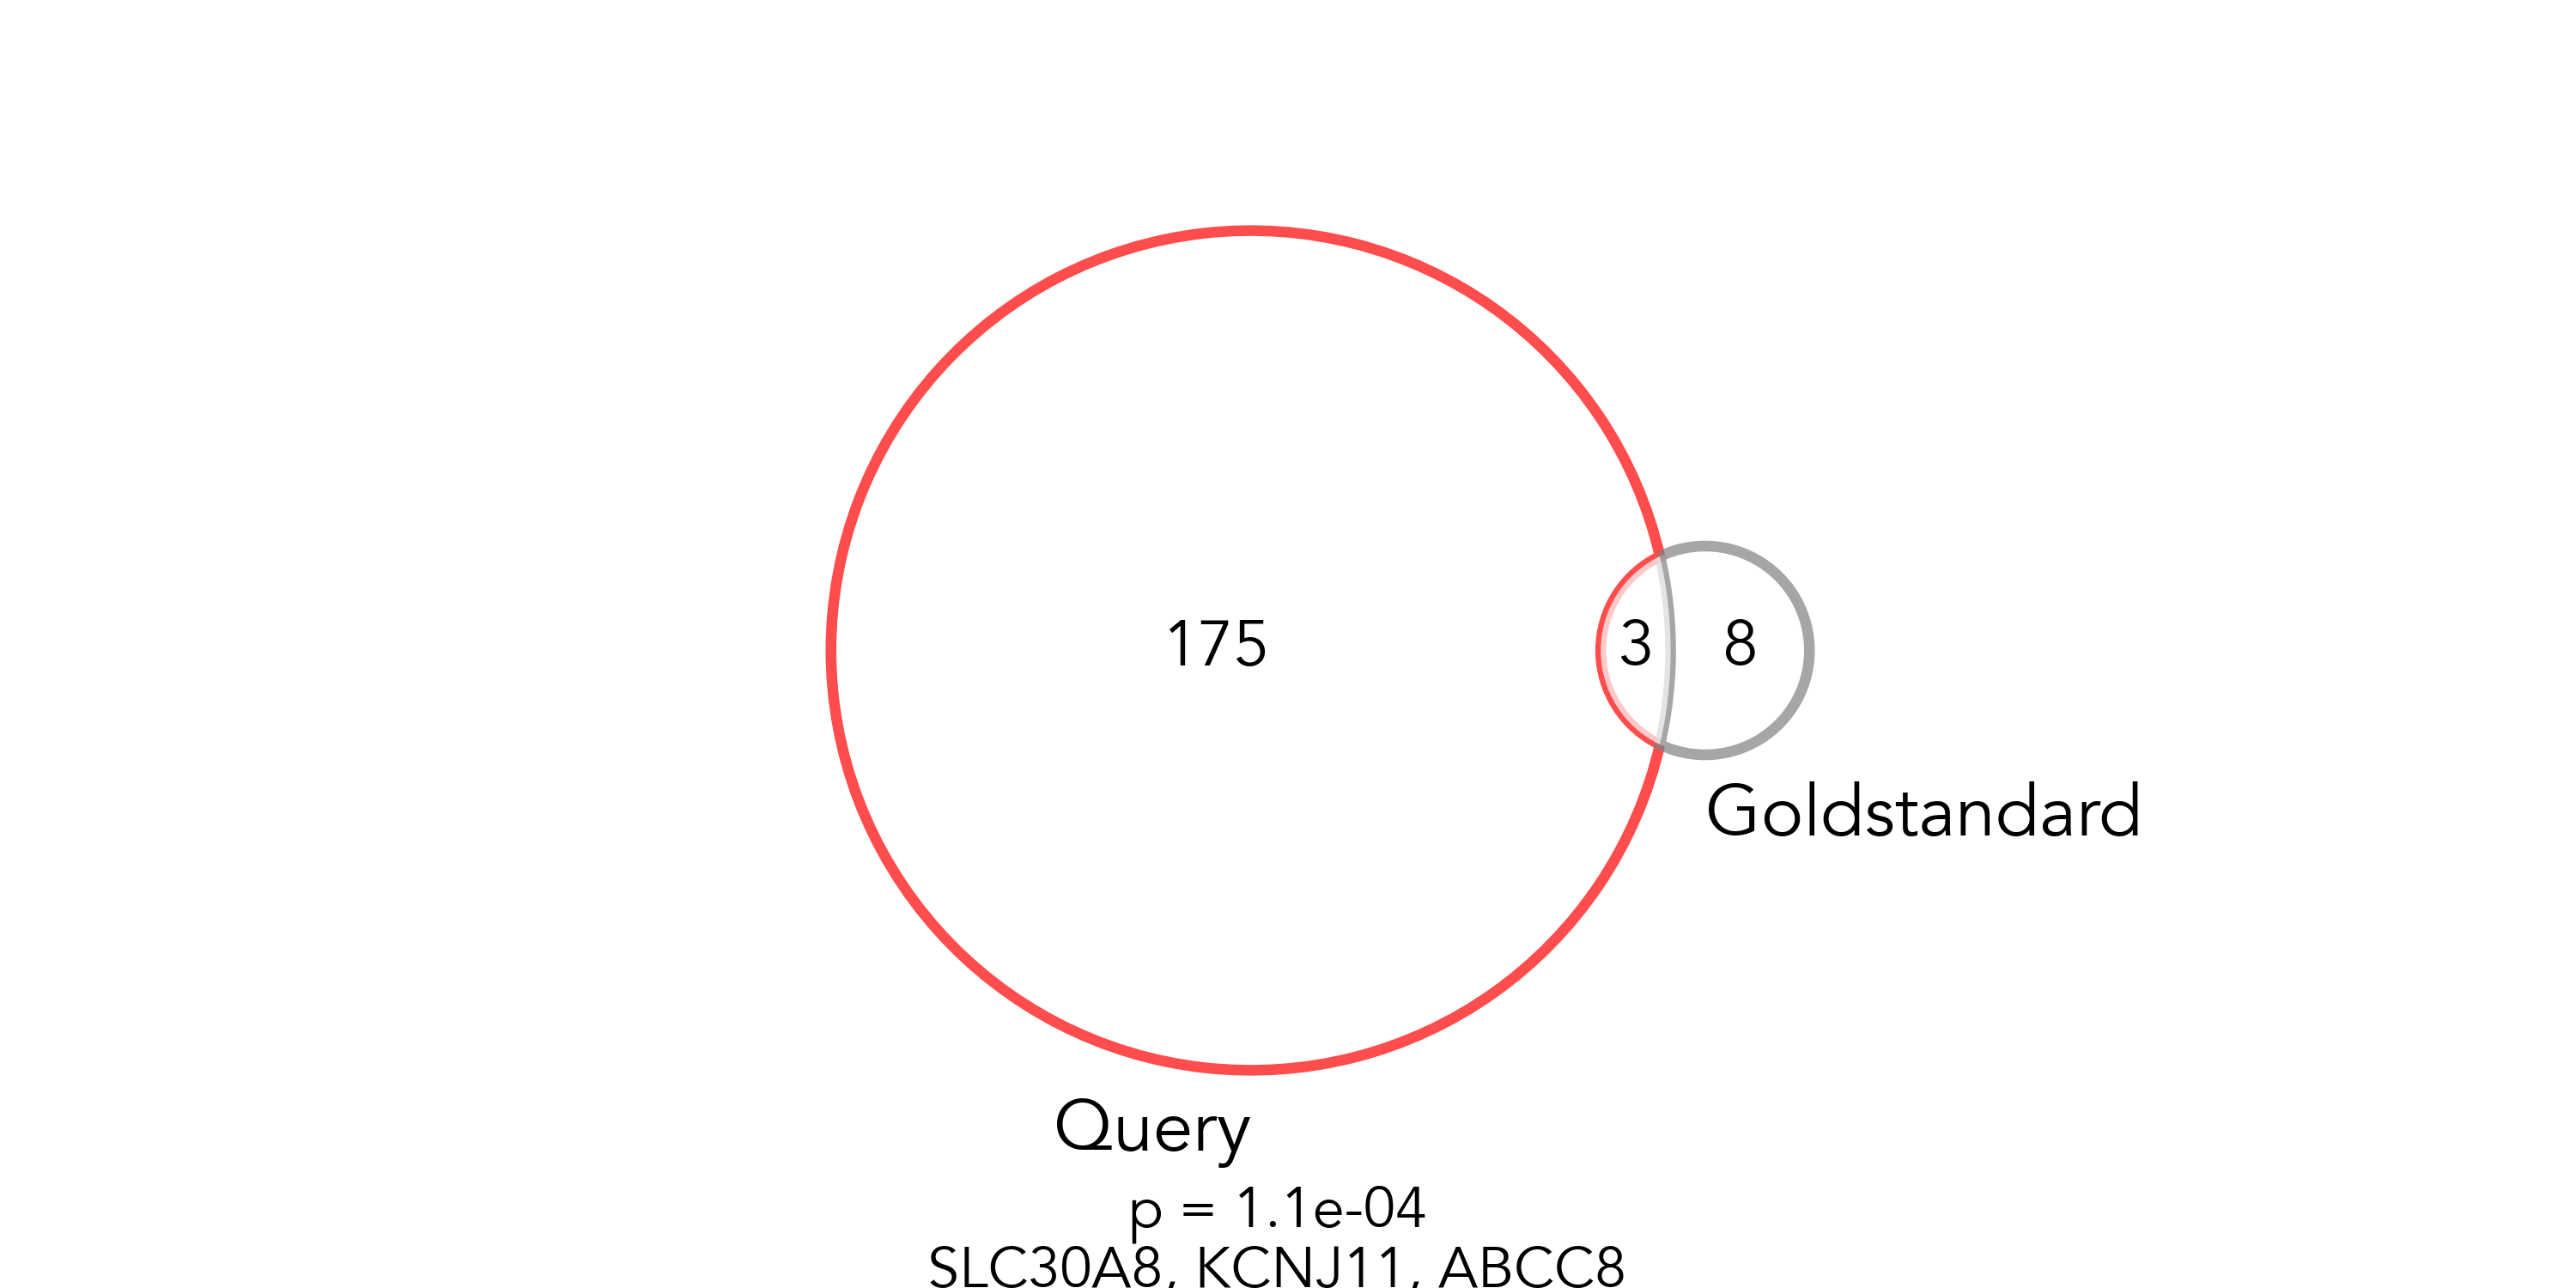

In [5]:
# GS overlap
overlapping_genes, pval, venn_diagram = GoldStandards.goldstandard_overlap(query = cauchy, goldstandard = gs, plot_fontsize = 18)
print(overlapping_genes)
venn_diagram

143 genes are mapped (out of 178) in Set_1
 10 genes are mapped (out of 11) in Set_2
 2 are overlapped and mapped (out of 3)

show_1_auroc:  0.68
show_2_auroc:  0.62


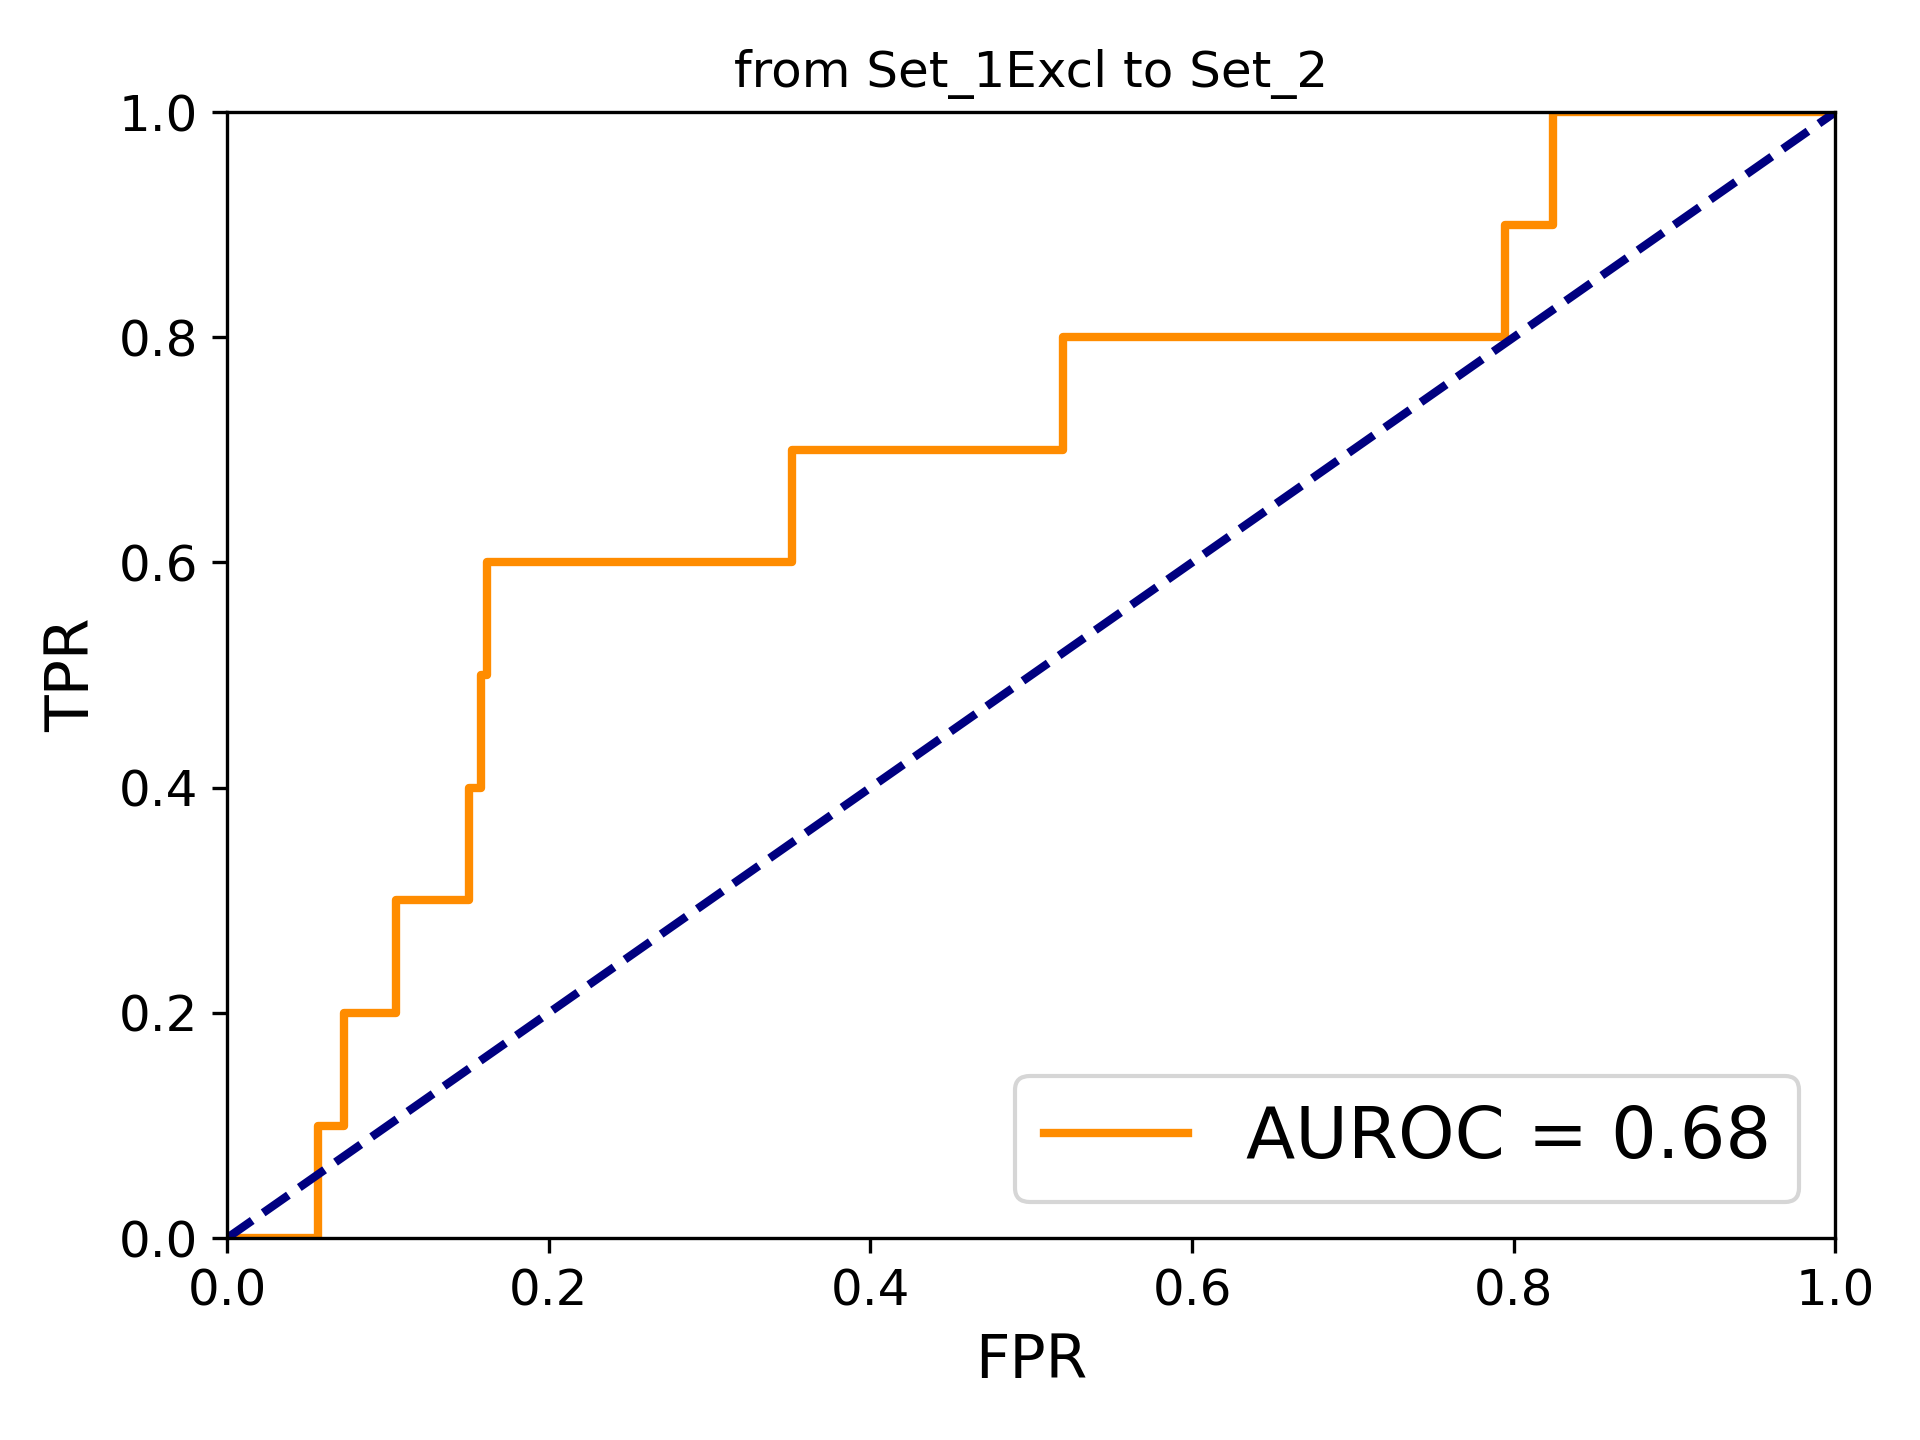

In [3]:
#ndiffusion
if __name__ == "__main__":
    show_1_auroc, show_1_z, show_2_auroc, show_2_z = GoldStandards.ndiffusion(set_1 = cauchy, set_2 = gs, edge_confidence = 'highest', n_iter = 10, cores = 6)
    print('show_1_ z-score: ', show_1_z)
    print('show_2_ z-score: ', show_2_z)
show_1_auroc

Number of b/w set connects in real gene sets: 15
Z-score based on curve fit: 3.5418605448835767
         node1   node2     score node1_source node2_source
8540455   AKT2  PIK3CG  0.940530       [set2]       [set1]
8540170   AKT2    TP53  0.960893       [set2]       [set1]
8540826   AKT2  CDKN1B  0.939121       [set2]       [set1]
8539858   AKT2   TRIB3  0.915213       [set2]       [set1]
1932382  EP300   PPARG  0.999642       [set1]       [set2]


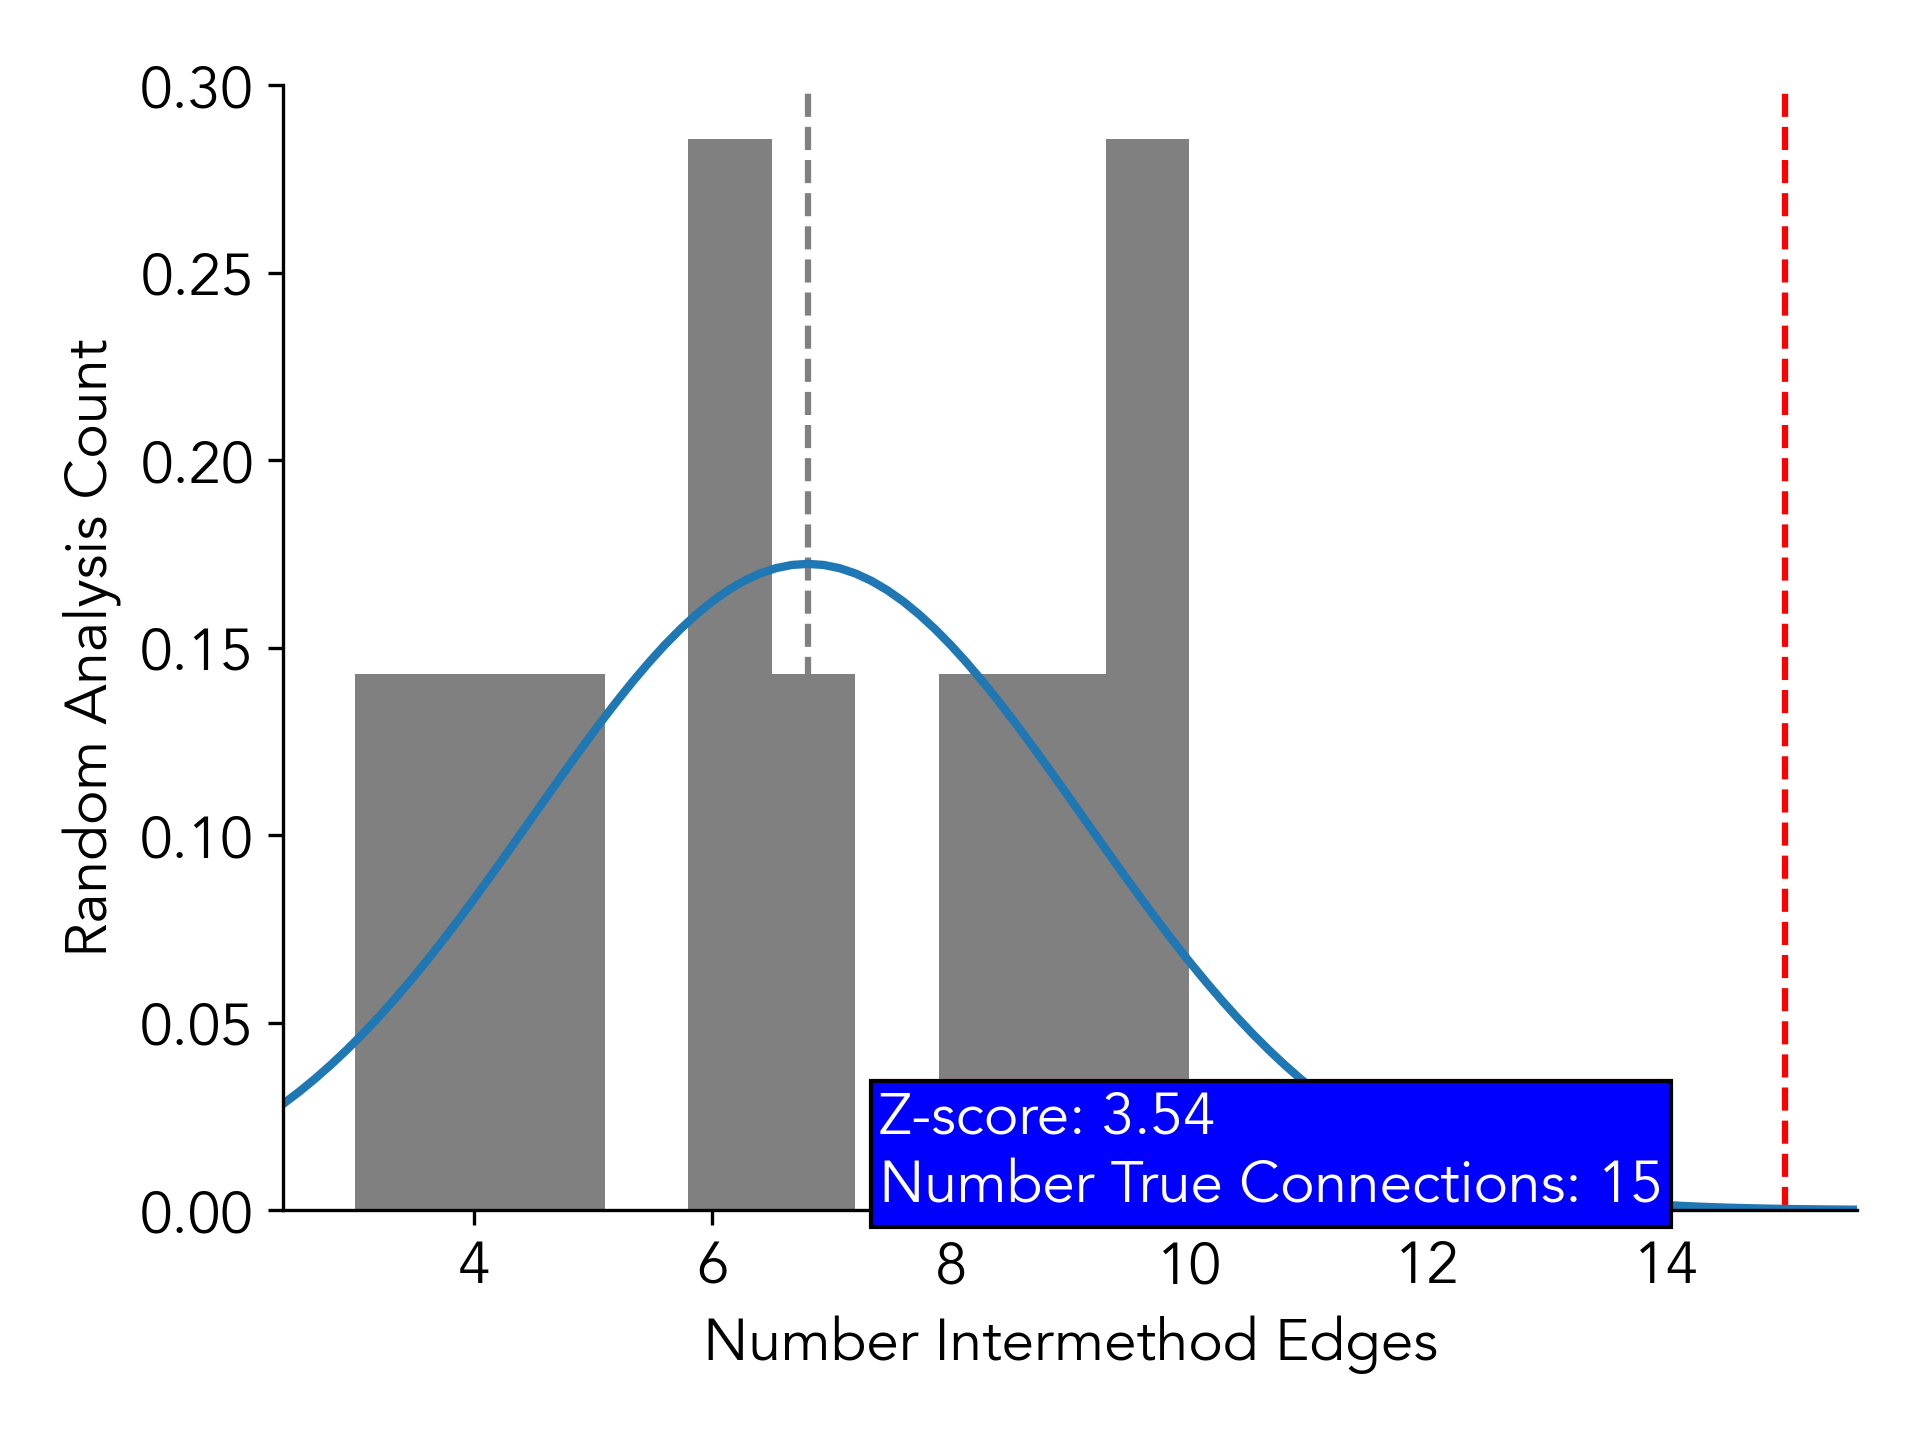

In [4]:
# Interconnectivity
if __name__ == '__main__':
    venn_, histo_, random_connections, connection_df, gene_sources = GoldStandards.interconnectivity(
        set_1 = cauchy,
        set_2 = gs,
        edge_confidence = 'highest',
        evidences = ['all'],
        num_iterations = 10,
        cores = 2
    )

print(connection_df.head(5))
histo_

In [3]:
# PubMed Co-Mentions
comention_df, z_scores, image_dict = GoldStandards.pubmed_comentions(
    query = cauchy,
    keyword = "diabetes",
    enrichment_trials = 5
)
print(comention_df.head(5))
print(z_scores)
print(image_dict[(15,50)])
# z_scores & image_dict are empty if run_enrichment == False

Pulling Publications for 5 random gene sets of 178 genes
 Random Trial : 0
       Count                           PMID for Gene + diabetes
EGFR    1944  34873433; 34824300; 35763030; 35239437; 370102...
KIT     1059  31425383; 33421511; 34850005; 34479471; 369116...
APOE    1031  33467546; 34609116; 30623143; 33938457; 360772...
NOS2     622  34294713; 37204119; 27567871; 34718103; 311886...
KCNJ11   596  32027066; 29792621; 35145023; 35893051; 264489...
{(-1, 0): (44, -8.490693304525813), (0, 5): (61, -0.9502552681394972), (5, 15): (17, 1.466426440045678), (15, 50): (20, 7.082422910679247), (50, 100000): (35, 8.31170617018308)}
dict_keys([(-1, 0), (0, 5), (5, 15), (15, 50), (50, 100000)])


In [10]:
# GWAS Catalog
if __name__ == '__main__':
    coloc_df, p = GoldStandards.gwas_catalog_colocalization(
        query = cauchy,
        mondo_id = 'MONDO_0005148',
        gwas_p_thresh = 5e-15,
        distance_mbp = 0.5,
        cores = 3
    )
print(coloc_df.head(5))
print(p)

Querying GWAS Catalog API for MONDO_0005148
Running query genes
Running background genes
      Gene                                               SNPs
0  SLC30A8  [rs3802177-? (SLC30A8; 3.9 Kbp), rs4269571-? (...
1    SGSM2                                                 []
2   ODF3L1  [rs6495182-C (PTPN9; 201.9 Kbp), rs11636031-T ...
3    SSTR4                                                 []
4     MST1                                                 []
0.000278570523392234


# Clinical

In [4]:
# Load data
cauchy = pd.read_csv('/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Runs/v5_BigPipeline_Mu_PyCFS/AgeSexBMI_Match_23Train/IMSB_3ML_Resources/GeneLists/StatisticalCombo/StatComboLists/Cauchy/v5_T2D_3Method_Cauchey_p<1.e-04.txt', header = None, names = ['Gene'])
savepath = "/Users/Kevin/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Genomics CFS Scripts/pyCFS Package/pyCFS_project/Examples/"
cauchy = cauchy['Gene'].tolist()

# of target genes tested in MGI: 136/178
                                               Freq  RandomAvgFreq  \
original_index                                                       
decreased macrophage cell number                  5       1.333333   
increased susceptibility to weight gain           4       1.166667   
increased circulating VLDL triglyceride level     4       1.166667   
abnormal vascular development                     6       2.500000   
abnormal response to infection                    7       1.800000   

                                               RandomStdFreq   z-score  \
original_index                                                           
decreased macrophage cell number                    0.471405  7.778175   
increased susceptibility to weight gain             0.372678  7.602631   
increased circulating VLDL triglyceride level       0.372678  7.602631   
abnormal vascular development                       0.500000  7.000000   
abnormal response to inf

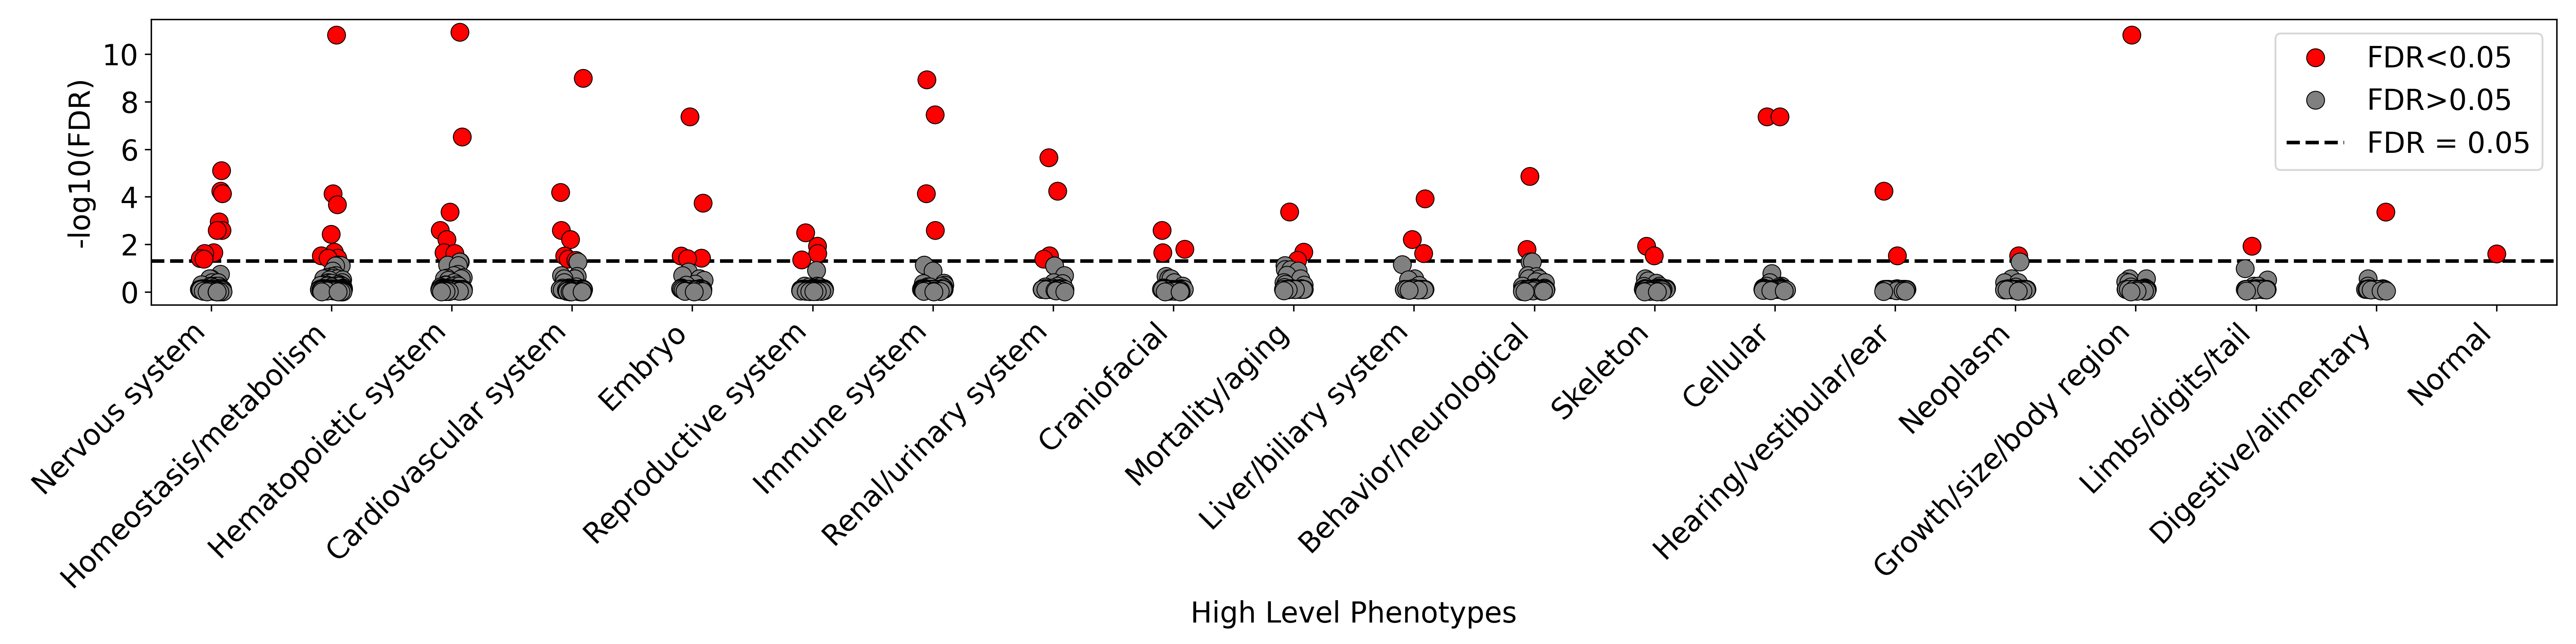

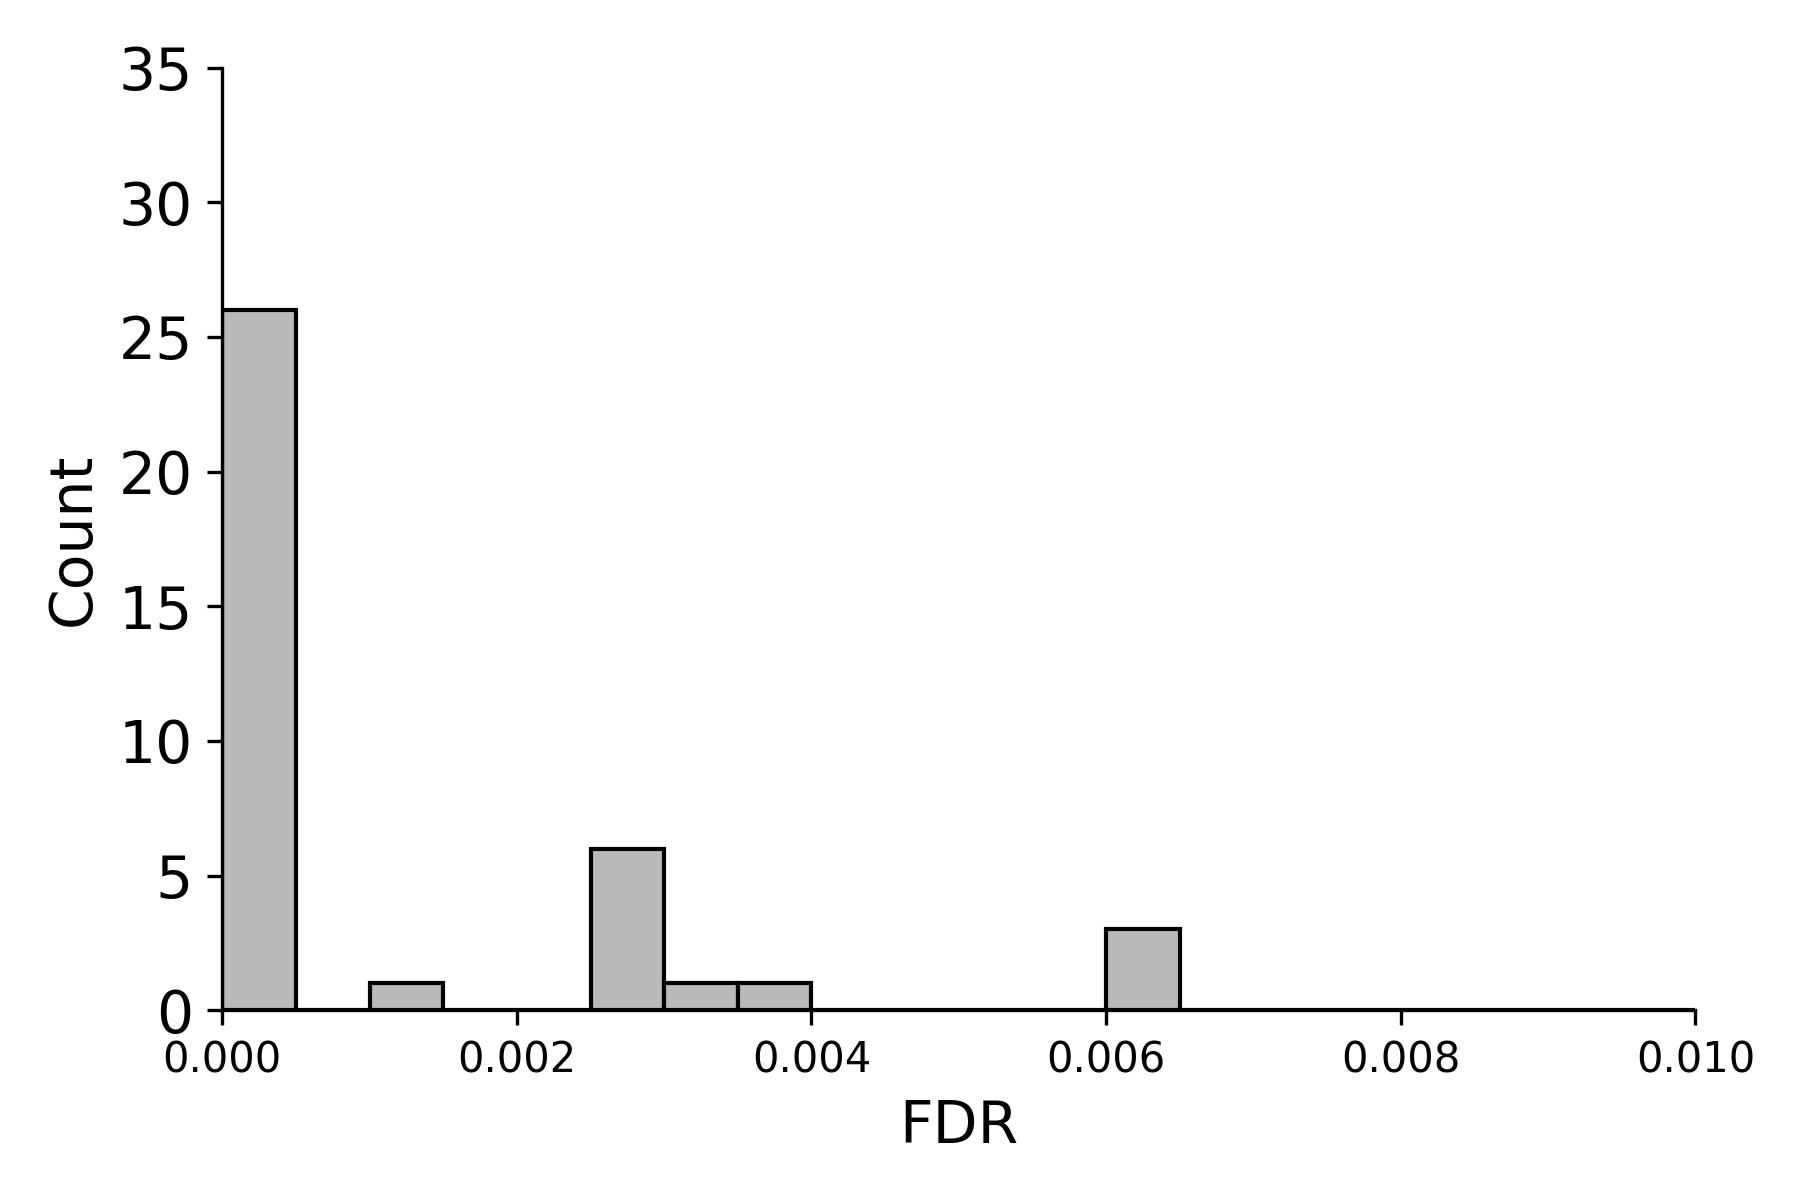

In [10]:
# Mouse phenotypes
if __name__ == "__main__":
    mouse_phenotype_df, strip_plot, fdr_plot = Clinical.mouse_phenotype_enrichment(
        query = cauchy,
        background = 'ensembl',
        random_iter = 10, # Low for example 
        cores = 2
    )
    print(mouse_phenotype_df.head(5))
    IPython.display.display(strip_plot)
    IPython.display.display(fdr_plot)

176/178 target genes in Open Targets
                           Freq  RandomAvgFreq  RandomStdFreq   z-score  \
Kinase                       11       4.083333       1.840894  3.757233   
Voltage-gated ion channel     4       1.619718       0.828476  2.873086   
Eraser                        2       1.125000       0.330719  2.645751   
Hydrolase                     7       3.082474       1.537638  2.547755   
no_level_assignment         127     141.740000       5.962583 -2.472083   

                             pvalue       fdr  \
Kinase                     0.000172  0.002749   
Voltage-gated ion channel  0.004065  0.032519   
Eraser                     0.008151  0.042985   
Hydrolase                  0.010842  0.042985   
no_level_assignment        0.013433  0.042985   

                                                                geneMappings  \
Kinase                     [FLT1, CSF1R, EGFR, BMP2K, PDGFRB, KIT, INSRR,...   
Voltage-gated ion channel                     [ABCC8, KCN

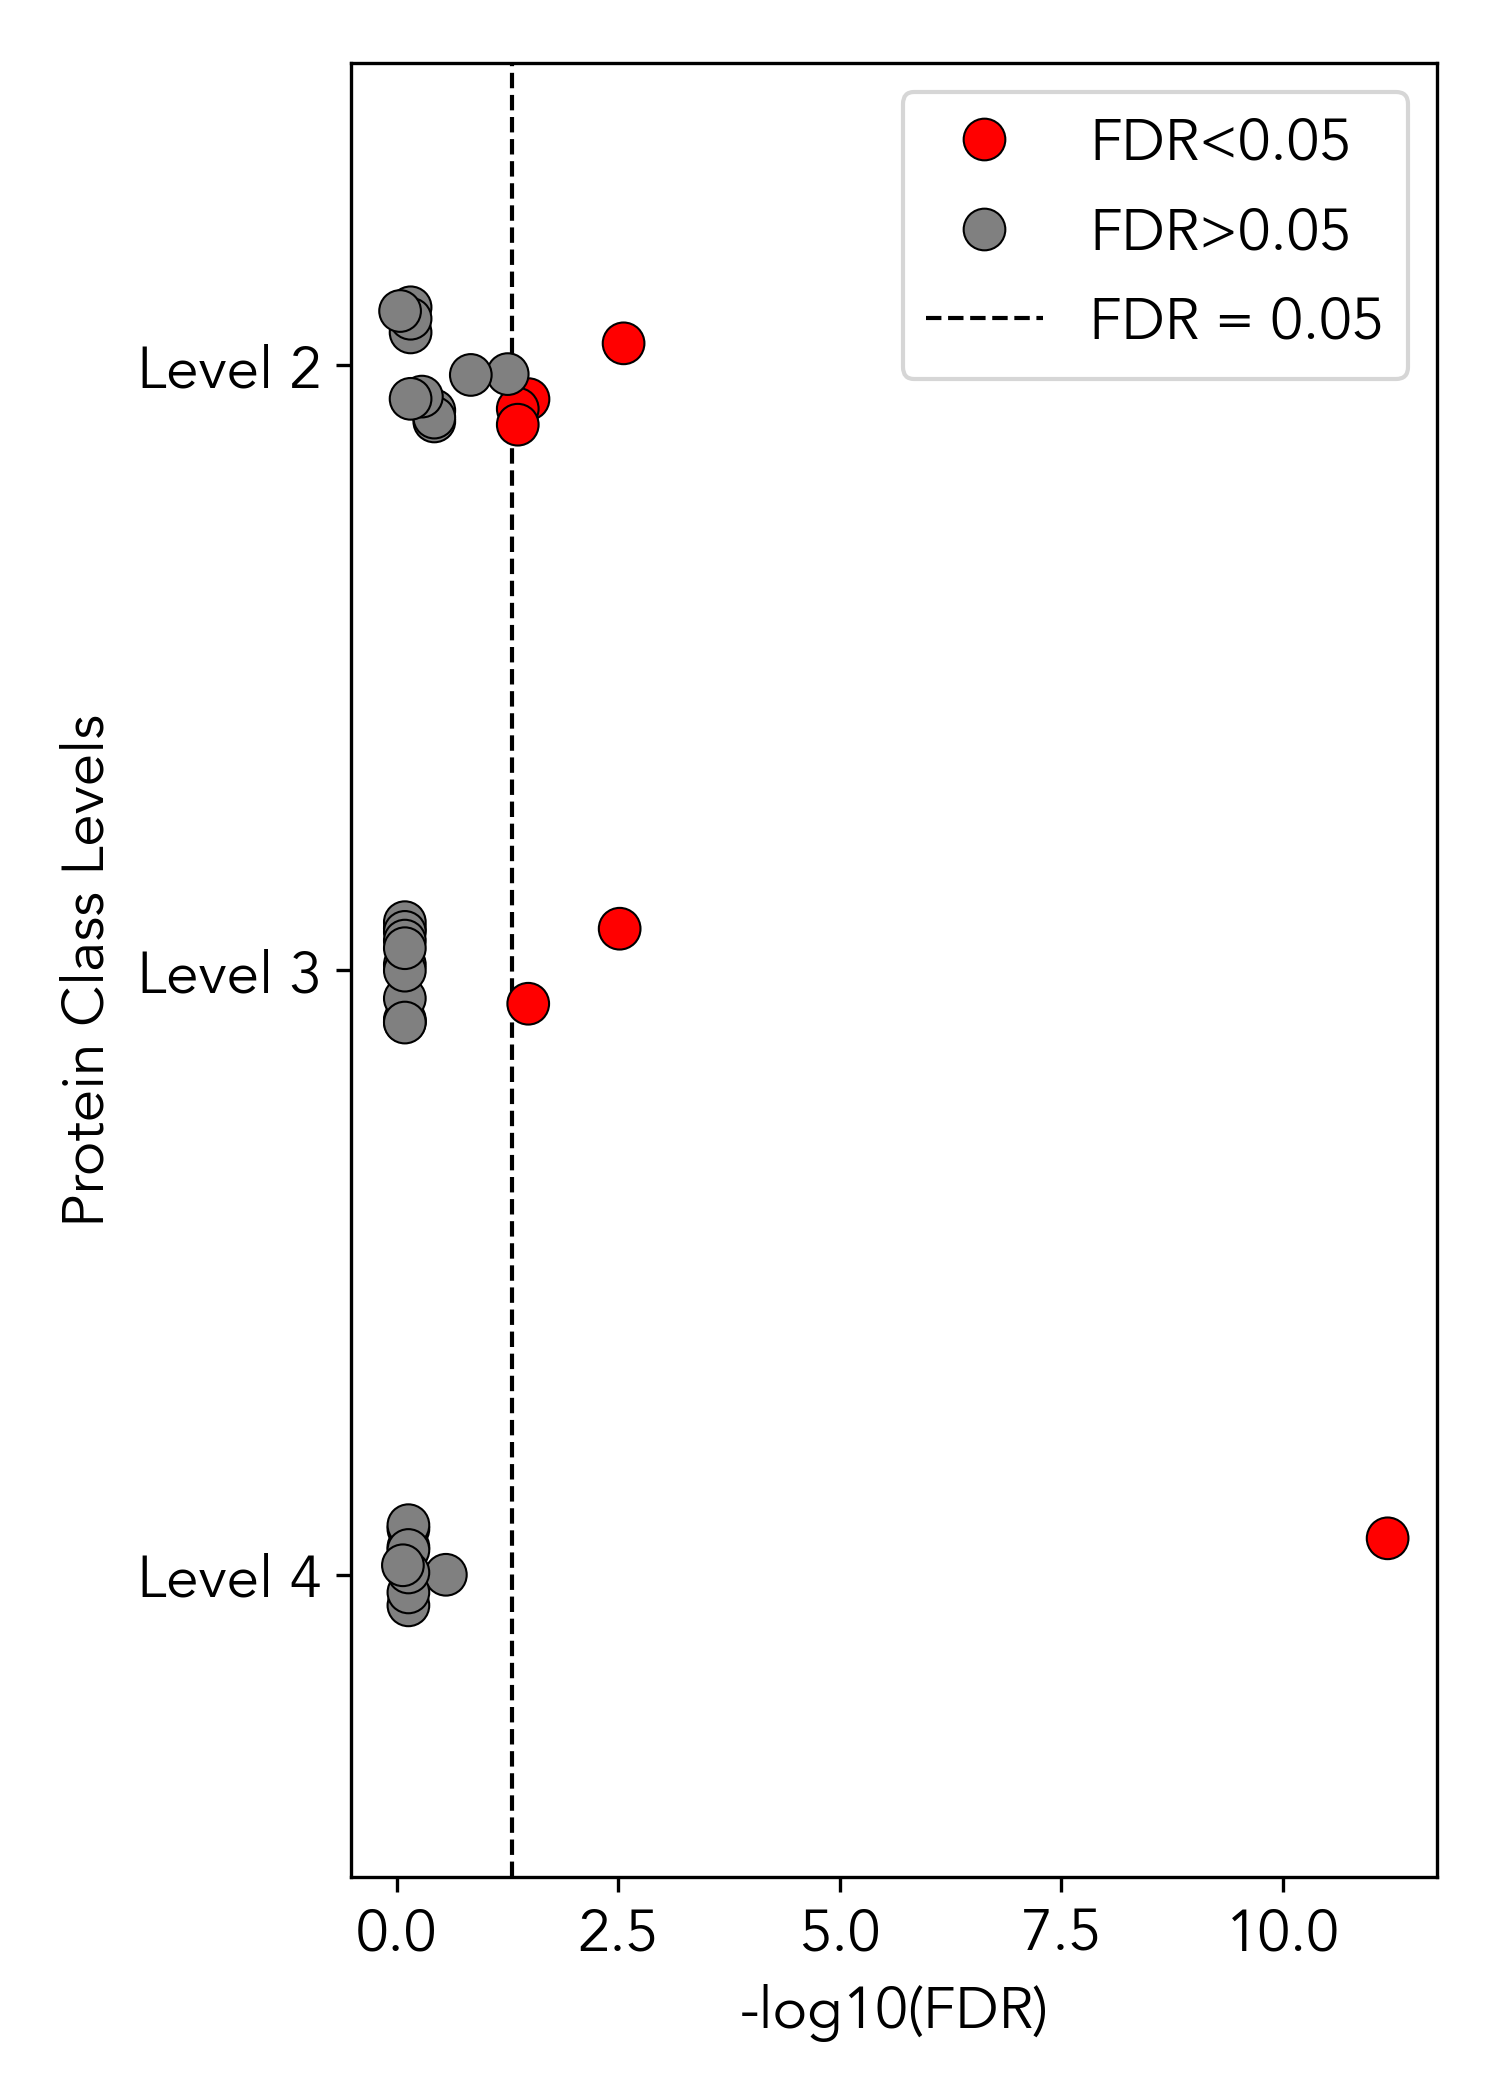

In [5]:
# Protein family enrichment
if __name__ == "__main__":
    enrichment_df, plot = Clinical.protein_family_enrichment(
        query = cauchy,
        background = 'ensembl',
        level = ['level2', 'level3', 'level4'],
        random_iter = 100, # Low for example - Default = 5000
        cores = 2,
        savepath = savepath + 'ProteinFamilyEnrichment/'
    )
    print(enrichment_df.head(5))
    IPython.display.display(plot)

Valid cancer types: ['Breast']
0.07255458089576675


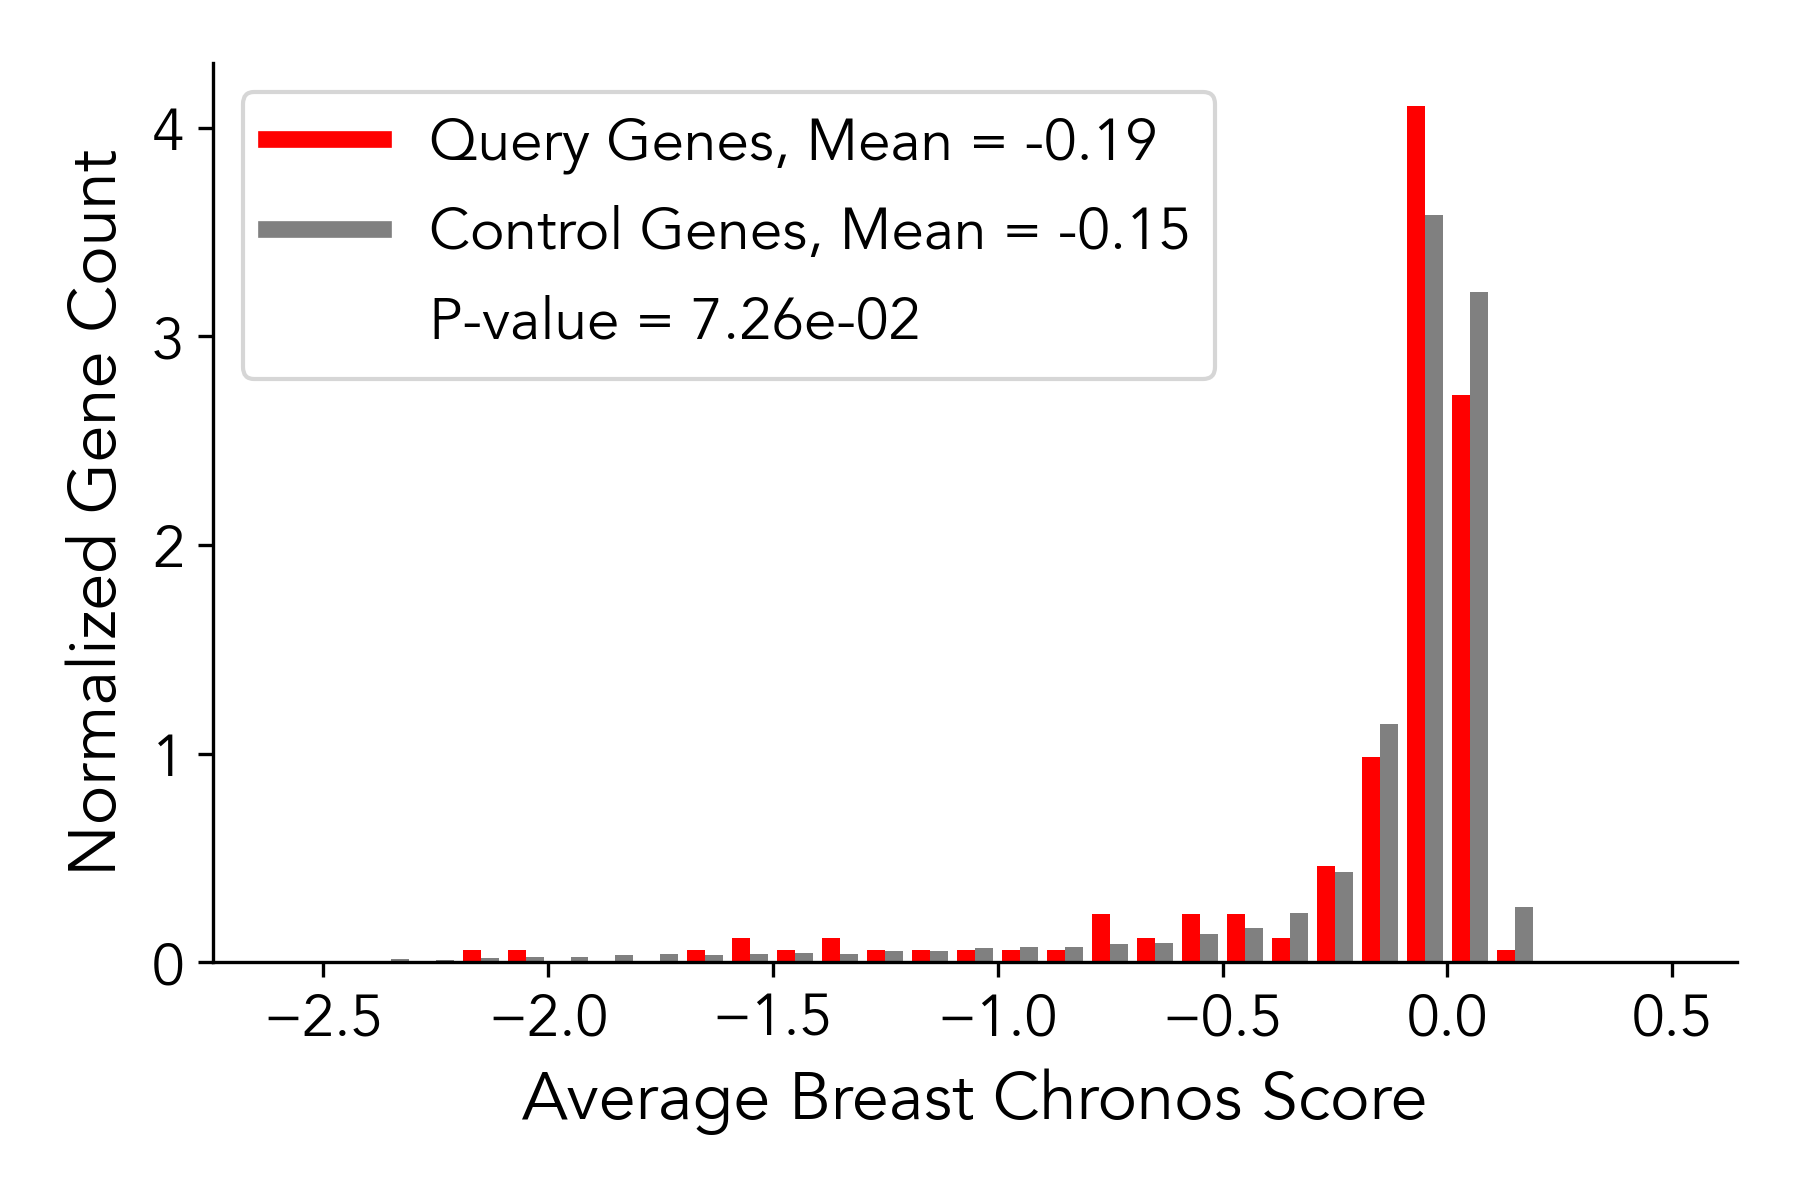

In [9]:
#depmap enrichment
p_val, plot = Clinical.depmap_enrichment(query = cauchy, cancer_type = ['Breast'])
print(p_val)
plot